In [1]:
#Import required packages
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import ipdb # deb

Using TensorFlow backend.


In [ ]:
# Getting the data ready
# Generate train dummy data for 1000 Students and dummy test 
# for 500
#Columns :Age, Hours of Study &Avg Previous test scores
np.random.seed(2018) #Setting seed for reproducibility
train_data, test_data = np.random.random((1000, 3)), np.random.random((500, 3))
#Generate dummy results for 1000 students : Whether Passed (1) 
# or Failed (0)
labels = np.random.randint(2, size=(1000, 2))

In [ ]:
#Defining the model structure with the required layers, 
# of neurons, activation function and optimizers

model = Sequential()
model.add(Dense(5, input_dim=3, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Train the model and make predictions
model.fit(train_data, labels, epochs=10, batch_size=32)

In [ ]:
#Make predictions from the trained model
predictions = model.predict(test_data)
predictions[:10]

## Train, Test and validation

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
# Generate dummy training dataset
np.random.seed(2019)
x_train = np.random.random((6000,10))
y_train = np.random.randint(2, size=(6000, 1))
# Generate dummy validation dataset
x_val = np.random.random((2000,10))
y_val = np.random.randint(2, size=(2000, 1))
# Generate dummy test dataset
x_test = np.random.random((2000,10))
y_test = np.random.randint(2, size=(2000, 1))

In [ ]:
#Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=10,activation = "relu")) #Layer 1
model.add(Dense(32,activation = "relu"))               #Layer 2
model.add(Dense(16,activation = "relu"))               #Layer 3
model.add(Dense(8,activation = "relu"))                #Layer 4
model.add(Dense(4,activation = "relu"))                #Layer 5
model.add(Dense(1,activation = "sigmoid"))             #Output Layer

In [ ]:
#Configure the model
model.compile(optimizer='Adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=64, epochs=3, 
validation_data=(x_val,y_val))

In [ ]:
print(model.metrics_names)

In [ ]:
print(model.evaluate(x_test,y_test))

In [ ]:
#Make predictions on the test dataset and print the first 10 
predictions
pred = model.predict(x_test)
pred[:10]

# Boston House Prices dataset

In [ ]:
from keras.datasets import boston_housing
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [ ]:
#Explore the data structure using basic python commands
print("Type of the Dataset:",type(y_train))
print("Shape of training data :",x_train.shape)
print("Shape of training labels :",y_train.shape)
print("Shape of testing data :",type(x_test))
print("Shape of testing labels :",y_test.shape)

Column Name Description :
- **CriM** per capita crime rate by town
- **Zn** proportion of residential land zoned for lots over 25,000 sq. ft.
- **inDUs** proportion of nonretail business acres per town
- **Chas** Charles river dummy variable (= 1 if tract bounds river; 0 otherwise)
- **noX** nitric oxide concentration (parts per 10 million)
- **rM** average number of rooms per dwelling
- **aGe** proportion of owner-occupied units built prior to 1940
- **Dis** weighted distances to five Boston employment centers
- **raD** index of accessibility to radial highways
- **taX** full-value property tax rate per $\$10,000$
- **ptratio** pupil-teacher ratio by town
- **B** $1000(Bk – 0.63)^2$, where Bk is the proportion of blacks by town
- **Lstat** \% lower status of the population
- **MeDV** median value of owner-occupied homes in $\$1000's$

In [ ]:
x_train[:5,:]

It a good idea, to split the training data in training set and validation set.

In [ ]:
# Extract the last 100 rows from the training 
# data to create the validation datasets.

x_val = x_train[300:,]
y_val = y_train[300:,]

In [ ]:
#Define the model architecture
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(6, kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [ ]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', 
              metrics=['mean_absolute_percentage_error'])

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=32, epochs=3, 
          validation_data=(x_val,y_val))

We have created a simple two-hidden-layer model for the regression use case. We have chosen _MAPE_ as the metric. Generally, this is not the best metric to choose for studying model performance, but its advantage is simplicity in terms of comprehending the results. It gives a simple percentage value for the error, say $10\%$ error. So, if you know the average range of your prediction, you can easily estimate what the predictions are going to look like

In [ ]:
results = model.evaluate(x_test, y_test)

In [ ]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i]," : ", results[i])

We can see that __MAPE__ is around $96\%$, which is actually not a great number to have for model performance. This would translate into our model predictions at around $96\%$ error. So, in general, if a house was priced at $10K$, our model would have predicted $\approx20K$.

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=32, epochs=30, 
          validation_data=(x_val,y_val))

# Regression

## Rossmann Store sales dataset

Rossmann is one of the largest drugstore chains in Germany, with 
operations across Europe. As of 2018, they have well over 3,900 stores in 
Europe with an annual turnover of 9 billion euros. Our task is to predict the 
sales for a few identified stores on a given day.

### Data fields

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

- **Id** - an Id that represents a (Store, Date) duple within the test set
- **Store** - a unique Id for each store
- **Sales** - the turnover for any given day (this is what you are predicting)
- **Customers** - the number of customers on a given day
- **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
- **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
- **StoreType** - differentiates between 4 different store models: a, b, c, d
- **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
- **CompetitionDistance** - distance in meters to the nearest competitor store
- **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
- **Promo** - indicates whether a store is running a promo on that day
- **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
- **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("./data/Rossmann Store Sales/train.csv")

C:\Users\kabon\AppData\Local\conda\conda\envs\aims\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print("Shape of the Dataset:",df.shape)
#the head method displays the first 5 rows of the data
df.head(5)

Shape of the Dataset: (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
store = pd.read_csv("./data/Rossmann Store Sales/store.csv")
print("Shape of the Dataset:",store.shape)
#Display the first 5 rows of data using the head method of pandas dataframe
store.head(5)

Shape of the Dataset: (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


To have all the data points together, we need to create one single 
dataframe with the store and promotion features. We can achieve this by 
joining the two dataframes on the ‘store’ column, which represents the 
store ID. Pandas provides a ‘merge’ function that is analogous to the join 
statement in SQL. We can perform left, right, inner, and full outer joins on 
one or more dataframes using one or more columns as the joining key.

In [6]:
df_new = df.merge(store,on=["Store"], how="inner")
print(df_new.shape)

(1017209, 18)


In [7]:
df_new.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [8]:
print("Distinct number of Stores :", len(df_new["Store"].unique()))
print("Distinct number of Days :", len(df_new["Date"].unique()))
print("Average daily sales of all stores : ",round(df_new["Sales"].mean(),2))

Distinct number of Stores : 1115
Distinct number of Days : 942
Average daily sales of all stores :  5773.82


In [9]:
df_new.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [10]:
df_new["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

Let’s create additional features that will help our model learn patterns 
better. We will create the week number, month, day, quarter, and year as 
features from the date variable. Similarly, since we are already creating 
time-related features, we can add a new feature based on climate and 
seasons. Considering that the stores are in Europe, we can refer to the 
standard season cycles and create a new season feature with values of 
Spring, Summer, Fall, and Winter. Pandas provides easy-to-use functions 
to extract date-related features; the season-related feature can be created 
with a simple ‘if else’ equivalent convention.

In [11]:
#We can extract all date properties from a datetime datatype
df_new['Date'] = pd.to_datetime(df_new['Date'], infer_datetime_format=True)
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.week
df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),"Spring",
                            np.where(df_new["Month"].isin([6,7,8]),"Summer",
                                     np.where(df_new["Month"].isin([9,10,11]),"Fall",
                                              np.where(df_new["Month"].isin([12,1,2]),"Winter","None"))))

In [12]:
df_new[["Date","Year","Month","Day","Week","Quarter","Season"]].head()

,Date,Year,Month,Day,Week,Quarter,Season
0,2015-07-31,2015,7,31,31,3,Summer
1,2015-07-30,2015,7,30,31,3,Summer
2,2015-07-29,2015,7,29,31,3,Summer
3,2015-07-28,2015,7,28,31,3,Summer
4,2015-07-27,2015,7,27,31,3,Summer


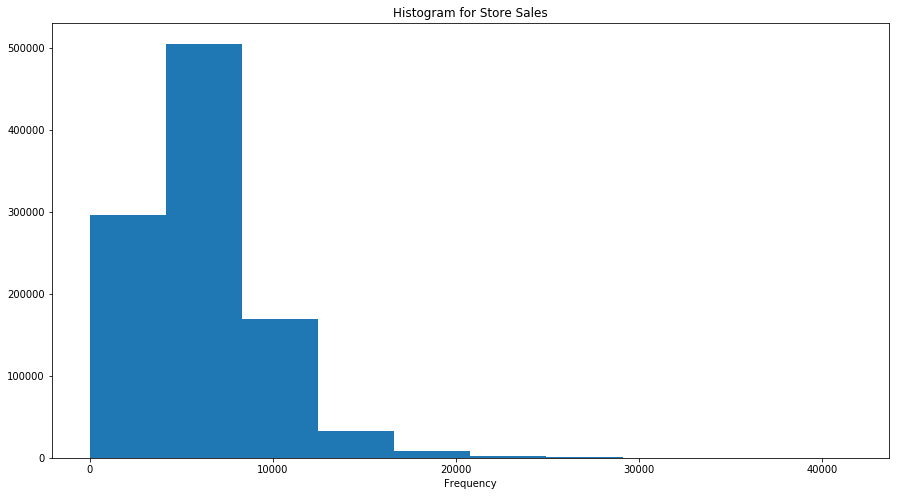

In [13]:
#Import matplotlib, python most popular data visualizing library
import matplotlib.pyplot as plt
%matplotlib inline
#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15,8))
plt.hist(df_new["Sales"])
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

The histogram helps us understand the distribution of the data at a 
high level. From the preceding plot, we can see that the data range is from 
0 to 40,000, but there is barely any data after 20,000. This indicates that 
most of the stores have sales in the range 0–20,000, and just a few stores 
have sales greater than 20,000. It might be worthwhile to remove these 
outliers, as it helps the model learn better.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B6489B518>,
      dtype=object)

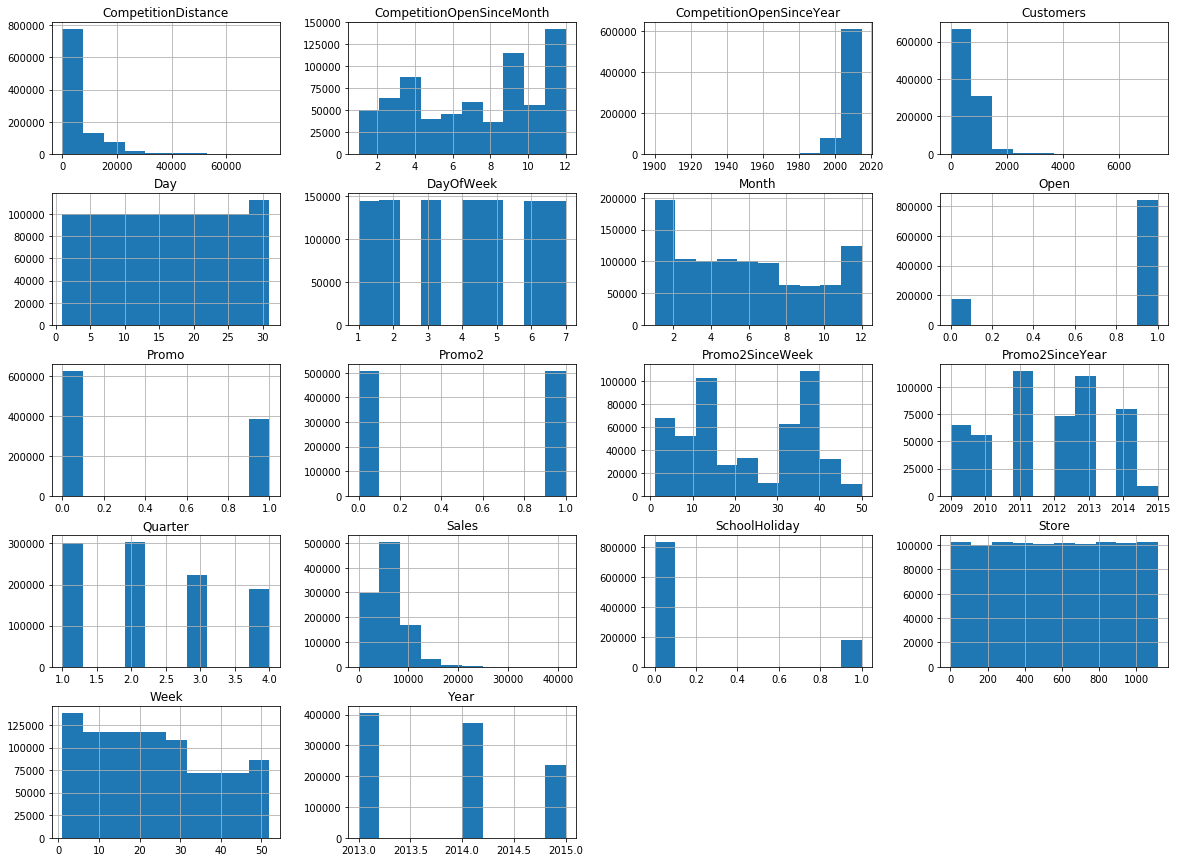

In [14]:
#Use the  histogram function provided by the Pandas object
#The function returns a cross-tab histogram plot for all numeric columns in the data
df_new.hist(figsize=(20,15))

Let’s have a look at the number of missing data points in each column 
(if any) in its associated percentage form.

In [15]:
df_new.isnull().sum()/df_new.shape[0] * 100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

We can see that Promo2SinceWeek, 
Promo2SinceYear, PromoInterval, CompetitionOpenSinceMonth, and 
CompetitionOpenSinceYear have over 30% null values. This is a big 
loss and there is nothing much we can do to fix this. As a rule of thumb, 
if there is a loss of anything between 0% and 10%, we can make a few 
attempts to fill the missing points and use the feature. But, 30% technically 
becomes beyond the usable range. On the other hand, we can see 
CompetitionDistance has around 0.25% missing values. This would much easier to handle and fix.

In [16]:
#Replace nulls with the mode
df_new["CompetitionDistance"]=df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])
#Double check if we still see nulls for the column
df_new["CompetitionDistance"].isnull().sum()/df_new.shape[0] * 100

0.0

The best way to study a categorical 
variable is to study the impact on the target variable from its individual 
classes. We can do this by plotting the mean sales across different values of 
the classes in the feature. To accomplish this, we can leverage “seaborn,” 
another powerful and easy-to-use Python visualization library, similar to 
matplotlib but providing much more beautiful visuals.

C:\Users\kabon\AppData\Local\conda\conda\envs\aims\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


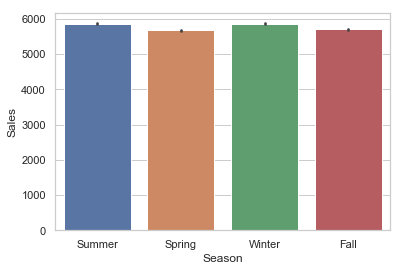

In [17]:
import seaborn as sns  #Seaborn is another powerful visualization library for Python
sns.set(style="whitegrid")
#Create the bar plot for Average Sales across different Seasons
ax = sns.barplot(x="Season", y="Sales", data=df_new)

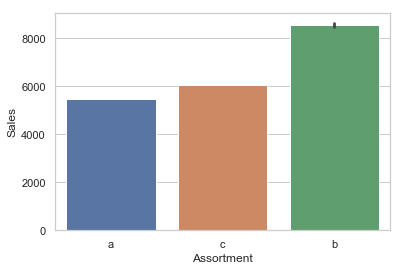

In [18]:
#Create the bar plot for Average Sales across different Assortments
ax = sns.barplot(x="Assortment", y="Sales", data=df_new)

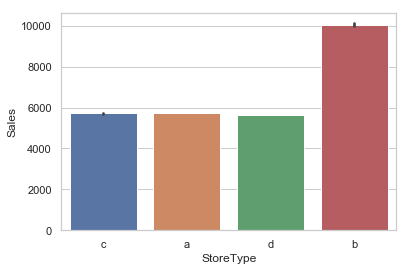

In [19]:
#Create the bar plot for Average Sales across different Store Types
ax = sns.barplot(x="StoreType", y="Sales", data=df_new)

As you can see, the seaborn package has internally calculated the 
average sales across its classes for the provided categorical column and 
displayed a beautiful bar plot showcasing the relationship with our 
target variable. We can change the aggregation function to a different 
one if required; this can be changed by using the ‘estimator’ parameter 
within the barplot function. Sales across seasons barely seem to 
differ; however, there seems to be an increasing trend for sales across 
assortments. Stores with assortment “b” generally have the highest sales. 
Store type also shows a unique relationship with sales across store types. 
We can see fairly higher sales for “b” store types also. However, before we 
conclude our observations, there is one more sanity check required to 
validate these hypotheses. What if the number of stores in the different 
types mentioned in the preceding is disproportionate or skewed? 
In such a scenario, our observation might be flawed. To cement our 
understanding about the observation, we can simply check the number 
of data points across each category using the same barplot function with 
one additional parameter setting. We will use a new aggregation function 
to showcase the counts as the metric for bar charts. The following code 
snippet visualizes the bar plots for the same set of categorical variables 
we studied earlier, albeit for counts.

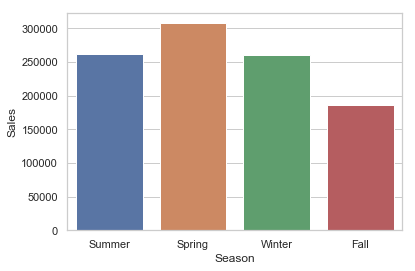

In [20]:
ax = sns.barplot(x="Season", y="Sales", data=df_new, estimator=np.size)

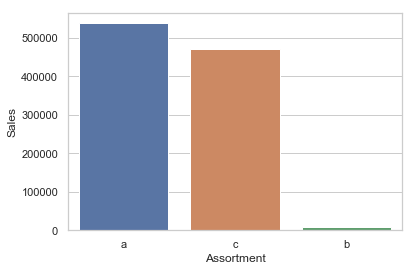

In [21]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new, estimator=np.size)

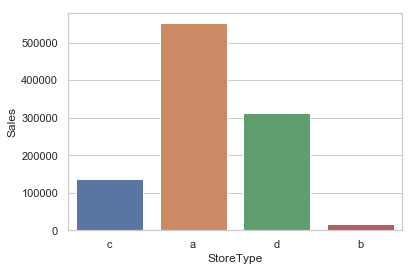

In [22]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new, estimator=np.size)

we will start with treating Season, Assortment, Month, 
Year, Quarter, DayOfWeek, and StoreType in one-hot encoded form and 
keep aside Day, Week, and Store as continuous for the time being. We will 
revisit this after we build a few models and study their performance.

To transform a categorical column into a one-hot encoded version, 
Python provides the preprocessing module in the sklearn package with 
rich and easy-to-use functions. The following code snippet engineers the 
training dataframe into the final required form for model development.

In [23]:
# Define a variable for each type of feature
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


target = ["Sales"]
numeric_columns = ["Customers","Open","Promo","Promo2", 
                   "StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year", 
                       "StoreType","Assortment","Season"] # note that we left aside (Day, Week, and Store)

# Define a function that will intake the raw dataframe and the 
# column name and return a one hot encoded DF
def create_ohe(df, col):
    le = LabelEncoder()
    a = le.fit_transform(df_new[col]).reshape(-1,1) #; ipdb.set_trace()
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [24]:
# Since the above function converts the column, one at a time
# We create a loop to create the final dataset with all features
temp = df_new[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(df_new, column)
    temp = pd.concat([temp,temp_df], axis=1)

C:\Users\kabon\AppData\Local\conda\conda\envs\aims\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\kabon\AppData\Local\conda\conda\envs\aims\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning,

In [25]:
print("Shape of Data:",temp.shape)
print("Distinct Datatypes:",temp.dtypes.unique())

Shape of Data: (1017209, 44)
Distinct Datatypes: [dtype('int64') dtype('O') dtype('float64')]


In [26]:
print(temp.columns[temp.dtypes=="object"])

Index(['StateHoliday'], dtype='object')


In [27]:
temp["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

The feature seems to have incorrect values. Ideally, StateHoliday 
should have either a 0 or 1 as the possible values to indicate whether it is a 
holiday or not. Let’s repair the feature by replacing all values of “a,” “b,” and 
“c” with 1 and the rest with 0, therefore converting the variable as numeric.

In [28]:
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)
# One last check of the data type
temp.dtypes.unique()

array([dtype('int64'), dtype('int32'), dtype('float64')], dtype=object)

Spliting data

In [29]:
from sklearn.model_selection import train_test_split

#Create train and test dataset with an 80:20 split
x_train, x_test, y_train, y_test = train_test_split(
    temp, df_new[target],test_size=0.2,random_state=2018)

#Further divide training dataset into train and validation 
# dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,test_size=0.1,random_state=2018)

In [30]:
#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (732390, 44)
Shape of x_val: (81377, 44)
Shape of x_test: (203442, 44)
Shape of y_train: (732390, 1)
Shape of y_val: (81377, 1)
Shape of y_test: (203442, 1)


### Defining Model

For a regression model, if we assume the mean value of sales in the 
training dataset to be the prediction for all samples in the test dataset, we 
would have a basic benchmark score. The DL model should at least score 
better than this score to be considered as useful.

In [31]:
#calculate the average score of the train dataset
mean_sales = y_train.mean()
print("Average Sales :",mean_sales)

Average Sales : Sales    5773.099997
dtype: float64


Now, if we assume the average sales as the prediction for all samples in 
the test dataset, what does the MAE metric look like?

In [32]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data : ",abs(y_test - mean_sales).mean()[0])

MAE for Test Data :  2883.587604303127


So, our baseline performance is 2,883.58.

If our DL model doesn’t deliver results better (i.e., lower) than the 
baseline score, then it would barely add any value.

##  Designing the DNN

Here are a few guidelines.

- **Rule 1: Start with small architectures.** 

In the case of DNNs, it is always advised to  start with a single-layer network with around 
100–300 neurons. Train the network and measure 
performance using the defined metrics (while 
defining the baseline score). If the results are not 
encouraging, try adding one more layer with the 
same number of neurons and repeating the process.

- __Rule 2: When small architectures (with two layers)__

fail, increase the size.
When the results from small networks are not 
great, you need to increase the number of neurons 
in layers by three to five times (i.e., around 1,000 
neurons in each layer). Also, increase regularization 
(to be covered in depth in Chapter 5) to 0.3, 0.4, 
or 0.5 for both layers and repeat the process for 
training and performance measurement.

- **Rule 3: When larger networks with two layers fail, go deeper.**

Try increasing the depth of the network with more 
and more layers while maintaining regularization with 
dropout layers (if required) after each dense (or your 
selected layer) with a dropout rate between 0.2 and 0.5.

- **Rule 4: When larger and deeper networks also fail, go even larger and even deeper.**

In case large networks with ~1000 neurons and five 
or six layers also don’t give the desired performance, 
try increasing the width and depth of the network. 
Try adding layers with 8,000–10,000 neurons per 
layer and a dropout of 0.6 to 0.8.

- **Rule 5: When everything fails, revisit the data.**

If all the aforementioned rules fail, revisit the 
data for improved feature engineering and 
normalization, and then you will need to try other 
ML alternatives.

In [33]:
#Create Deep Neural Network Architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
#The input_dim =44, since the width of the training data=44 (refer data engg section)
model.add(Dense(1,activation = "linear"))

#Configure the model
model.compile(optimizer='adam',loss="mean_absolute_error",
metrics=["mean_absolute_error"])

Instructions for updating:
Colocations handled automatically by placer.


In [53]:
#Train the model
model.fit(x_train.values,y_train.values, validation_data= 
(x_val,y_val),epochs=10,batch_size=64)

Instructions for updating:
Use tf.cast instead.
Train on 732390 samples, validate on 81377 samples
Epoch 1/10
732390/732390 [==============================] - 20s 27us/step - loss: 944.1957 - mean_absolute_error: 944.1957 - val_loss: 813.4872 - val_mean_absolute_error: 813.4872
Epoch 2/10
732390/732390 [==============================] - 19s 26us/step - loss: 775.6383 - mean_absolute_error: 775.6383 - val_loss: 742.3698 - val_mean_absolute_error: 742.3698
Epoch 3/10
732390/732390 [==============================] - 19s 26us/step - loss: 736.9702 - mean_absolute_error: 736.9702 - val_loss: 799.5314 - val_mean_absolute_error: 799.5314
Epoch 4/10
732390/732390 [==============================] - 20s 27us/step - loss: 721.3819 - mean_absolute_error: 721.3819 - val_loss: 719.9784 - val_mean_absolute_error: 719.9784
Epoch 5/10
732390/732390 [==============================] - 20s 28us/step - loss: 710.0932 - mean_absolute_error: 710.0932 - val_loss: 701.6288 - val_mean_absolute_error: 701.6288
E

In [56]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(x_test.values,y_test.values) # ,value to moove from data set to array

#Print the results
for i in range(len(model.metrics_names)):
     print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

203442/203442 [==============================] - 4s 19us/step
Metric  loss : 685.43
Metric  mean_absolute_error : 685.43


(Mean) 2883.587604303127 vs 685.43 (DNN)

### Improoving model

In the following network, we have added two more layers with similar 
numbers of neurons. We will update our loss function to mean squared 
error instead of MAE. Let’s train the network and have a look at the 
performance on the test dataset.

In [57]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam', 
              loss="mean_squared_error", 
              metrics=["mean_absolute_error"])

history = model.fit(x_train,y_train, validation_data=(x_val, y_val),
                    epochs=10, batch_size=64)

Train on 732390 samples, validate on 81377 samples
Epoch 1/10
732390/732390 [==============================] - 43s 58us/step - loss: 1691443.3842 - mean_absolute_error: 847.3790 - val_loss: 1087885.7231 - val_mean_absolute_error: 710.3793
Epoch 2/10
732390/732390 [==============================] - 49s 67us/step - loss: 1151747.6039 - mean_absolute_error: 719.0575 - val_loss: 1119718.4192 - val_mean_absolute_error: 710.5457
Epoch 3/10
732390/732390 [==============================] - 47s 64us/step - loss: 1082322.8907 - mean_absolute_error: 697.6016 - val_loss: 1117289.8744 - val_mean_absolute_error: 703.3232
Epoch 4/10
732390/732390 [==============================] - 42s 57us/step - loss: 1052601.6808 - mean_absolute_error: 687.6659 - val_loss: 1081153.4025 - val_mean_absolute_error: 710.8458
Epoch 5/10
732390/732390 [==============================] - 41s 56us/step - loss: 1030185.1860 - mean_absolute_error: 680.8107 - val_loss: 968891.5280 - val_mean_absolute_error: 663.5924
Epoch 6/10

In [58]:
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
     print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

203442/203442 [==============================] - 7s 33us/step
Metric  loss : 866659.72
Metric  mean_absolute_error : 633.87


Let’s try a couple of more experiments to see if we can expect further 
improved performance. We can develop another deeper model with five 
hidden layers having 150 neurons each. In this case, we have increased the 
number of epochs from 10 to 15. This would therefore increase computation.

In [62]:
model = Sequential()

model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',
              loss="mean_squared_error",
              metrics=["mean_absolute_error"])

In [ ]:
model.fit(x_train, y_train, validation_data=(x_val,y_val), 
          epochs=15, batch_size=64)

Train on 732390 samples, validate on 81377 samples
Epoch 1/15
732390/732390 [==============================] - 64s 87us/step - loss: 1716957.9798 - mean_absolute_error: 853.8289 - val_loss: 1196167.5887 - val_mean_absolute_error: 732.6655
Epoch 2/15
732390/732390 [==============================] - 53s 73us/step - loss: 1175442.5758 - mean_absolute_error: 727.0923 - val_loss: 1099237.9834 - val_mean_absolute_error: 712.7677
Epoch 3/15
732390/732390 [==============================] - 51s 70us/step - loss: 1106732.0154 - mean_absolute_error: 704.2600 - val_loss: 1083439.6732 - val_mean_absolute_error: 707.8036
Epoch 4/15
732390/732390 [==============================] - 49s 67us/step - loss: 1066826.3348 - mean_absolute_error: 691.6451 - val_loss: 1023087.4982 - val_mean_absolute_error: 685.9948
Epoch 5/15
732390/732390 [==============================] - 49s 67us/step - loss: 1039569.2811 - mean_absolute_error: 683.8736 - val_loss: 972839.4858 - val_mean_absolute_error: 669.9178
Epoch 6/15

In [64]:
result = model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
     print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

203442/203442 [==============================] - 8s 40us/step
Metric  loss : 853185.95
Metric  mean_absolute_error : 623.45


## Increasing the Number of Neurons

In [ ]:
model = Sequential()

model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',
              loss="mean_squared_error",
              metrics=["mean_absolute_error"])

model.fit(x_train,y_train, 
          validation_data=(x_val,y_val), 
          epochs=15,batch_size=64)

Train on 732390 samples, validate on 81377 samples
Epoch 1/15
732390/732390 [==============================] - 75s 103us/step - loss: 1681049.2638 - mean_absolute_error: 845.0163 - val_loss: 1095784.5159 - val_mean_absolute_error: 702.9435
Epoch 2/15
732390/732390 [==============================] - 63s 85us/step - loss: 1134787.7877 - mean_absolute_error: 718.8289 - val_loss: 1066428.4619 - val_mean_absolute_error: 690.9370
Epoch 3/15
732390/732390 [==============================] - 61s 84us/step - loss: 1077134.2575 - mean_absolute_error: 698.7673 - val_loss: 1008960.6082 - val_mean_absolute_error: 677.7883
Epoch 4/15
732390/732390 [==============================] - 58s 79us/step - loss: 1049427.7120 - mean_absolute_error: 687.8471 - val_loss: 1021140.9707 - val_mean_absolute_error: 690.0111
Epoch 5/15
732390/732390 [==============================] - 61s 83us/step - loss: 1034104.1897 - mean_absolute_error: 682.9730 - val_loss: 1006016.0412 - val_mean_absolute_error: 680.5373
Epoch 6/

In [61]:
result = model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
     print("Metric ",model.metrics_names[i],":", str(round(result[i],2)))

203442/203442 [==============================] - 12s 57us/step
Metric  loss : 869558.97
Metric  mean_absolute_error : 631.66


We can see quite a bit of improvement when we use an architecture 
that was built with a higher number of neurons. This was a considerable 
improvement for the model. Let us now try deeper models for the same 
architecture. Additionally, we add a new [optional] configuration to the 
model to record the history of various metrics during the training process. 
This can be done by adding the callbacks parameter, as shown in the 
following example. We can use the history, post training, to visualize and 
understand the model’s learning curve.

In [ ]:
from keras.callbacks import History

history = History()
model = Sequential()

model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',
              loss="mean_squared_error",
              metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val),
          epochs=15, batch_size=64, callbacks=[history])

Instructions for updating:
Use tf.cast instead.
Train on 732390 samples, validate on 81377 samples
Epoch 1/15
732390/732390 [==============================] - 233s 318us/step - loss: 1658517.4647 - mean_absolute_error: 840.1185 - val_loss: 1112159.5537 - val_mean_absolute_error: 717.4959
Epoch 2/15
732390/732390 [==============================] - 209s 285us/step - loss: 1103200.4848 - mean_absolute_error: 701.6468 - val_loss: 1002709.7077 - val_mean_absolute_error: 676.5568
Epoch 4/15
732390/732390 [==============================] - 202s 276us/step - loss: 998065.4381 - mean_absolute_error: 669.5933 - val_loss: 970425.7231 - val_mean_absolute_error: 677.0410
Epoch 8/15
732390/732390 [==============================] - 201s 275us/step - loss: 935239.5956 - mean_absolute_error: 650.1757 - val_loss: 1019935.9629 - val_mean_absolute_error: 670.9327
Epoch 12/15
 47232/732390 [>.............................] - ETA: 3:03 - loss: 925285.4220 - mean_absolute_error: 648.2250

In [35]:
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

203442/203442 [==============================] - 25s 122us/step
Metric  loss : 902861.65
Metric  mean_absolute_error : 632.76


## Plotting the Loss Metric Across Epochs

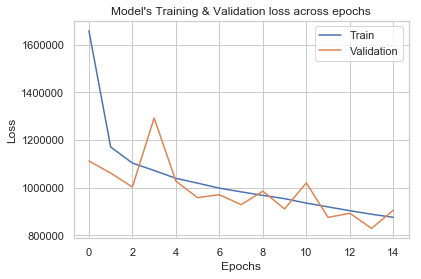

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Testing the Model Manually

In [38]:
#Manually predicting from the model, instead of using model's 
# evaluate function
y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(10))

        Actual Sales  Predicted Sales
115563             0         0.582598
832654             0         0.582598
769112          2933      3279.186035
350588          8602      7237.194336
141556          6975      6670.568359
84435           9239      8569.637695
53018              0         0.582598
262419             0         0.582598
702267          5885      5648.060547
981431             0         0.582598


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("MSE :",mean_squared_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))

MSE : 902861.6502037379
MAE : 632.7620767973223


# Hyperparameters in DL

We will then look 
at various approaches for selecting the right set of hyperparameters for a 

## Number of Neurons in a Layer

 Generally, 
a simple rule of thumb for selecting the number of neurons in the first 
layer is to refer to the number of input dimensions. If the final number of 
input dimensions in a given training dataset (this includes the one-hot encoded features also) is x, we should use at least the closest number to 2x 
in the power of 2. Let’s say you have 100 input dimensions in your training 
dataset: preferably start with 2 × 100 = 200, and take the closest power of 2,  
so 256. It is good to have the number of neurons in the power of 2, as it 
helps the computation of the network to be faster. Also, good choices for 
the number of neurons would be 8, 16, 32, 64, 128, 256, 512, 1024, and so 
on. Based on the number of input dimensions, take the number closest to 
2 times the size. So, when you have 300 input dimensions, try using 512 
neurons.

## Number of Layers

It is true that just adding a few more layers will generally increase the 
performance, at least marginally. But the problem is that with an increased 
number of layers, the training time and computation increase significantly. 
Moreover, you would need a higher number of epochs to see promising 
results. Not using deeper networks is not an always an option; in cases 
when you have to, try using a few best practices.
In case you are using a very large network, say more than 20 layers, 
try using a tapering size architecture (i.e., gradually reduce the number 
of neurons in each layer as the depth increases). So, if you are using an 
architecture of 30 layers with 512 neurons in each layer, try reducing the 
number of neurons in the layers slowly. An improved architecture would 
be with the first 8 layers having 512 neurons, the next 8 with 256, the next 
8 with 128, and so on. For the last hidden layer (not the output layer), try 
keeping the number of neurons to at least around 30–40% of the input size.
Alternatively, if you are using wider networks (i.e., not reducing the 
number of neurons in the lower layers), always use L2 regularization or 
dropout layers with a drop rate of around 30%. The chances of overfitting 
are highly reduced.

##  Weight Initialization

Initializing the weights for your network also has a tremendous impact 
on the overall performance. A good weight initialization technique not 
only speeds up the training process but also circumvents deadlocks in 
the model training process. By default, the Keras framework uses glorot 
uniform initialization, also called Xavier uniform initialization, but this can be changed as per your needs. We can initialize the weights for a layer 
using the kernel initializer parameter as well as bias using a bias initializer.
Other popular options to select are ‘He Normal’ and ‘He Uniform’ 
initialization and ‘lecun normal’ and ‘lecun uniform’ initialization. 
There are quite a few other options available in Keras too, but the 
aforementioned choices are the most popular.

In [ ]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64,activation="relu", input_dim = 32, kernel_
initializer = "random_uniform",bias_initializer = "zeros"))
model.add(Dense(1,activation="sigmoid"))

## Batch Size

Using a moderate batch size always helps achieve a smoother learning 
process for the model. A batch size of 32 or 64, irrespective of the dataset 
size and the number of samples, will deliver a smooth learning curve in 
most cases. Even in scenarios where your hardware environment has 
large RAM memory to accommodate a bigger batch size, I would still 
recommend staying with a batch size of 32 or 64.

## Dropout

In addition to L1 and L2 regularization, there is another popular technique 
in DL to reduce overfitting. This technique is to use a dropout mechanism. 
In this method, the model arbitrarily drops or deactivates a few neurons 
for a layer during each iteration

The following code snippet showcases dropout added to the dense 
hidden layer. The parameter value of 0.25 indicates the dropout rate  
(i.e., the percentage of the neurons to be dropped).

In [ ]:
from keras import Sequential
from keras.layers.core import Dropout, Dense
model = Sequential()
model.add(Dense(100, input_dim= 50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation="linear"))